In [ ]:
# 자주 쓸 library 먼저 불러오기
import pandas as pd 
import numpy as np 

In [ ]:
# csv 파일에서 DataFrame을 생성
dataset1 = pd.read_csv('/content/trainset_진보수.csv', encoding = 'UTF-8')

# 수강여부 O,X 결과를 각각 1,0으로 나타내기
dataset1.loc[dataset1["수강여부"] == "X","수강여부"] = 0
dataset1.loc[dataset1["수강여부"] == "O","수강여부"] = 1

# DataFrame 확인 
print(dataset1.shape)  # (row 개수, column 개수)
print(dataset1.info()) # 데이터 타입, row 개수, column 개수, 컬럼 데이터 타입 
print(dataset1.describe()) # 요약 통계 정보 

(2500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   마일리지              2500 non-null   int64  
 1   신청과목수             2500 non-null   int64  
 2   총이수학점/졸업이수학점      2500 non-null   float64
 3   직전학기이수학점/학기당수강학점  2500 non-null   float64
 4   학년                2500 non-null   int64  
 5   수강여부              2500 non-null   object 
 6   초수강여부             2500 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 136.8+ KB
None
              마일리지        신청과목수  총이수학점/졸업이수학점  직전학기이수학점/학기당수강학점          학년
count  2500.000000  2500.000000   2500.000000       2500.000000  2500.00000
mean     14.846400     5.806800      0.486878          0.881265     2.69240
std      10.127973     0.600015      0.224115          0.138223     0.80873
min       1.000000     1.000000      0.055500          0.000000     2.00000
25%       6.

In [ ]:
print(dataset1.iloc[0:5])  # dataset.head() -> 첫 5개
print(dataset1.iloc[-5:])  # dataset.tail() -> 마지막 5개 

   마일리지  신청과목수  총이수학점/졸업이수학점  직전학기이수학점/학기당수강학점  학년 수강여부 초수강여부
0    36      6        0.9920            0.8888   4    1     Y
1    36      6        0.7777            0.8333   4    1     Y
2    36      6        0.7214            0.8947   4    1     Y
3    36      6        0.6214            1.0000   3    1     Y
4    36      6        0.6000            1.0000   3    1     Y
      마일리지  신청과목수  총이수학점/졸업이수학점  직전학기이수학점/학기당수강학점  학년 수강여부 초수강여부
2495     1      6        0.2698            0.8888   2    0     Y
2496     1      6        0.2658            0.9166   2    0     Y
2497     1      6        0.8134            1.0000   4    1     N
2498     1      6        0.5642            0.9736   3    1     N
2499     1      5        0.5000            0.6944   3    1     Y


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트 
X = dataset1.iloc[:, 0:5].to_numpy() # DataFrame을 np.ndarray로 변환 -> 수강여부랑 초수강여부가 string이라 제외했음
print(X)

[[36.      6.      0.992   0.8888  4.    ]
 [36.      6.      0.7777  0.8333  4.    ]
 [36.      6.      0.7214  0.8947  4.    ]
 ...
 [ 1.      6.      0.8134  1.      4.    ]
 [ 1.      6.      0.5642  0.9736  3.    ]
 [ 1.      5.      0.5     0.6944  3.    ]]


In [ ]:
# y = 전체 행, 수강신청여부 열 데이터 
y = dataset1.iloc[:, 5].to_numpy()
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
# print(len(X_train), len(X_test))
# dataset2 = pd.read_csv("/content/testset.csv")

In [ ]:
X_train = dataset1.iloc[:2280, 0:5].to_numpy()  # 위에 define한 X랑 같음, 진보수:2280, 영이: 1600, 스과적: 723
y_train = dataset1.iloc[:2280, 5].to_numpy()    # 위에 define한 y랑 같음, 
X_test = dataset1.iloc[2280:, 0:5].to_numpy()
y_test = dataset1.iloc[2280:, 5].to_numpy()
y_train = y_train.astype('int') # 정수값을 인식할 수 있도록 변환시키기
y_test = y_test.astype('int')   # 정수값을 인식할 수 있도록 변환시키기
# X_test = dataset2.iloc[:, 0:5].to_numpy()
# y_test = dataset2.iloc[:, 5].to_numpy()
print(len(X_train), len(X_test))

2280 220


In [ ]:
print(X_train[:3])
print(y_train[:3])

[[36.      6.      0.992   0.8888  4.    ]
 [36.      6.      0.7777  0.8333  4.    ]
 [36.      6.      0.7214  0.8947  4.    ]]
[1 1 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN 분류기를 생성 
classifier = KNeighborsClassifier(n_neighbors = 3)
# 분류기 학습 
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# 예측 
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
# 모델 평가 
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix[0][1]=0
print(conf_matrix)
# O,X 사용시: 진양성 위음성   0,1 사용시:  진음성  위양성 
#           위양성 진음성               위음성  진양성

[[ 51   0]
 [ 26 140]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.94      0.78        54
           1       0.98      0.84      0.91       166

    accuracy                           0.87       220
   macro avg       0.82      0.89      0.84       220
weighted avg       0.90      0.87      0.87       220



In [ ]:
# 6. 모델 개선 - k값을 변화시킬 때, 에러가 줄어드는지
errors = [] 
for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  errors.append(np.mean(pred_i != y_test))

print(errors)

[0.013636363636363636, 0.21363636363636362, 0.1318181818181818, 0.22272727272727272, 0.15, 0.19545454545454546, 0.1409090909090909, 0.19545454545454546, 0.16818181818181818, 0.18181818181818182, 0.14545454545454545, 0.19545454545454546, 0.16818181818181818, 0.18181818181818182, 0.15, 0.16818181818181818, 0.14545454545454545, 0.17727272727272728, 0.1409090909090909, 0.1590909090909091, 0.14545454545454545, 0.17727272727272728, 0.11818181818181818, 0.15454545454545454, 0.12727272727272726, 0.1590909090909091, 0.12272727272727273, 0.1409090909090909, 0.11363636363636363, 0.1318181818181818]


In [ ]:
import matplotlib.pyplot as plt

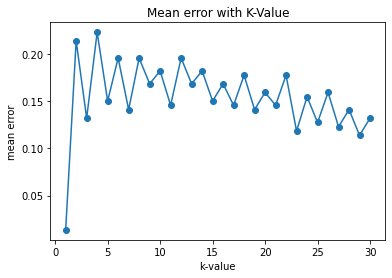

In [ ]:
plt.plot(range(1,31), errors, marker = 'o')
plt.title("Mean error with K-Value")
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

In [ ]:
# ROC 커브 준비 
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

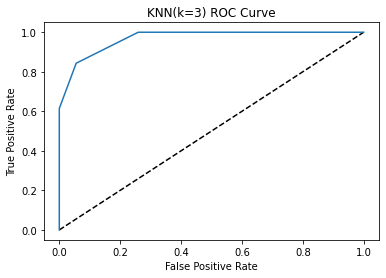

In [ ]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN(k=3) ROC Curve')
plt.show()

In [ ]:
# ROC 커브의 면적을 구하면 AUC, 분류기의 정확도를 구할 수 있음
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.968987059348505